In [1]:
# libaraies used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
# loading the dataset
batting_dataset=pd.read_csv('batting_summary.csv')
bowling_dataset=pd.read_csv('bowling_summary.csv')
Match_Schedule_dataset=pd.read_csv('match_schedule_results.csv')


In [3]:
batting_dataset.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [4]:
bowling_dataset.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [5]:
Match_Schedule_dataset.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [6]:
#Match analysis
Match_Schedule_dataset.info()
Match_Schedule_dataset.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_no       48 non-null     int64 
 1   Date           48 non-null     object
 2   Venue          48 non-null     object
 3   Team1          48 non-null     object
 4   Team2          48 non-null     object
 5   Winner         48 non-null     object
 6   Scorecard URL  48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


Match_no         0
Date             0
Venue            0
Team1            0
Team2            0
Winner           0
Scorecard URL    0
dtype: int64

In [7]:
# changing Datatype into correct formats beacuse all of them are in object format

Match_Schedule_dataset['Venue'] = Match_Schedule_dataset['Venue'].astype('string')
Match_Schedule_dataset['Date'] = pd.to_datetime(Match_Schedule_dataset['Date'] + '-2023', format='%B %d-%Y')
Match_Schedule_dataset['Winner'] = Match_Schedule_dataset['Winner'].astype('string')
Match_Schedule_dataset['Team2'] = Match_Schedule_dataset['Team2'].astype('string')
Match_Schedule_dataset['Team1'] = Match_Schedule_dataset['Team1'].astype('string')


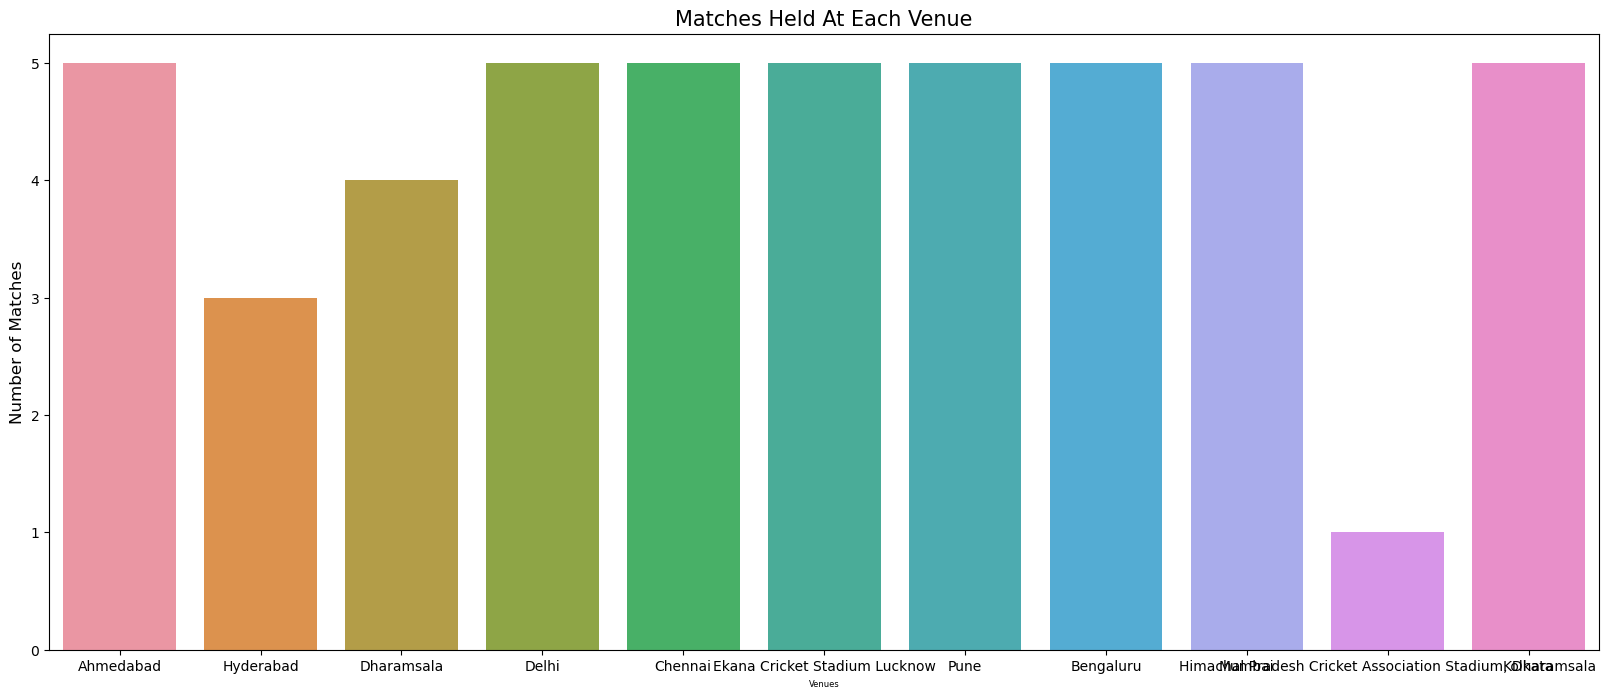

In [8]:
#Matches happened in Venues

plt.figure(figsize=(20, 8))
sns.countplot(x='Venue', data=Match_Schedule_dataset)
plt.title('Matches Held At Each Venue',color='black',size=15)
plt.ylabel('Number of Matches',color='black',size=12)
plt.xlabel('Venues',color='black',size=6)
plt.show()


In [9]:
# Teams Partcipated in world cup
Teams= Match_Schedule_dataset['Winner'].unique()
print("Teams Participated in Worldcup :")
for Team in Teams:
    print(Team)

Teams Participated in Worldcup :
New Zealand
Pakistan
Bangladesh
South Africa
India
England
Afghanistan
Australia
Netherlands
Sri Lanka


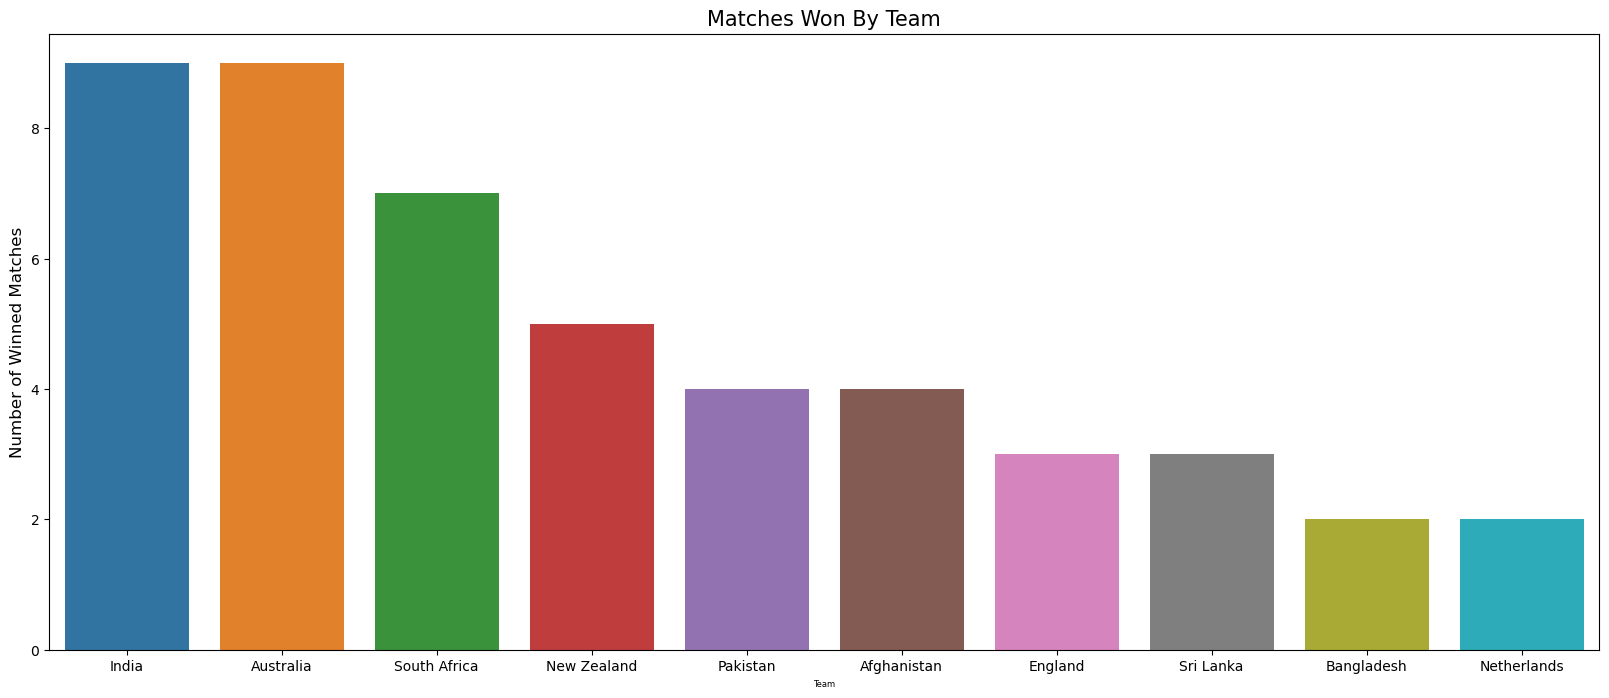

In [10]:
# Win count of teams participated in world cup

win_Count = Match_Schedule_dataset['Winner'].value_counts().index


plt.figure(figsize=(20, 8))
sns.countplot(x='Winner', data=Match_Schedule_dataset, order=win_Count)
plt.title('Matches Won By Team',color='black',size=15)
plt.ylabel('Number of Winned Matches',color='black',size=12)
plt.xlabel('Team',color='black',size=6)
plt.show()

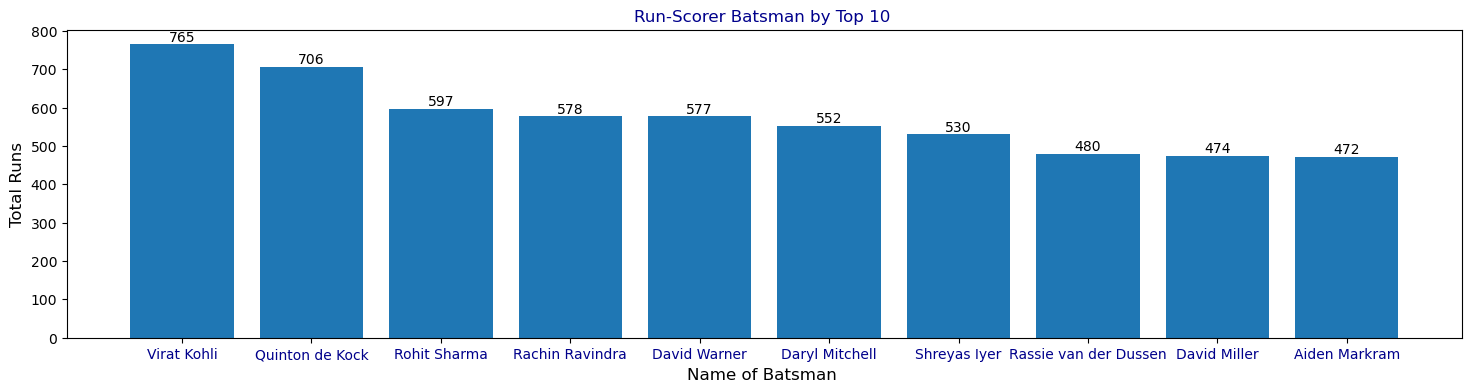

In [11]:
#Batting Analytics

top_scorer_in_Worldcup = batting_dataset.groupby('Batsman_Name')['Runs'].sum().reset_index().sort_values(by='Runs', ascending=False)
plt.figure(figsize=(18,4))

#top scorer
plt.bar(top_scorer_in_Worldcup['Batsman_Name'].head(10), top_scorer_in_Worldcup['Runs'].head(10))
plt.title('Run-Scorer Batsman by Top 10 ',size=12,color='darkblue')
plt.xlabel('Name of Batsman ',size=12,color='black')
plt.ylabel('Total Runs',size=12,color='black')
plt.xticks(rotation=360,color='darkblue')
for index, value in enumerate(top_scorer_in_Worldcup['Runs'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

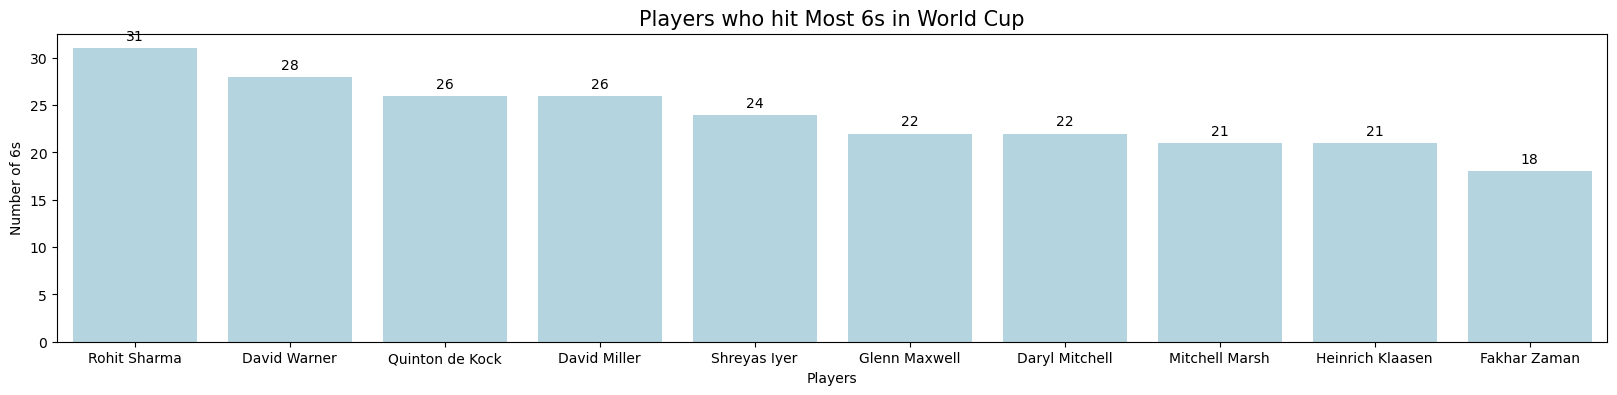

In [12]:
plt.figure(figsize=(20, 4))
sixs=batting_dataset[batting_dataset['6s'] > 0]
total_6s = sixs.groupby('Batsman_Name')['6s'].sum().sort_values(ascending=False)
sns.barplot(x=total_6s.head(10).index, y=total_6s.head(10).values, color='lightblue')
plt.title("Players who hit Most 6s in World Cup", size=15, color='black')
plt.xlabel("Players", size=10, color='black')
plt.ylabel("Number of 6s", size=10, color='black')



for index, value in enumerate(total_6s.head(10).values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

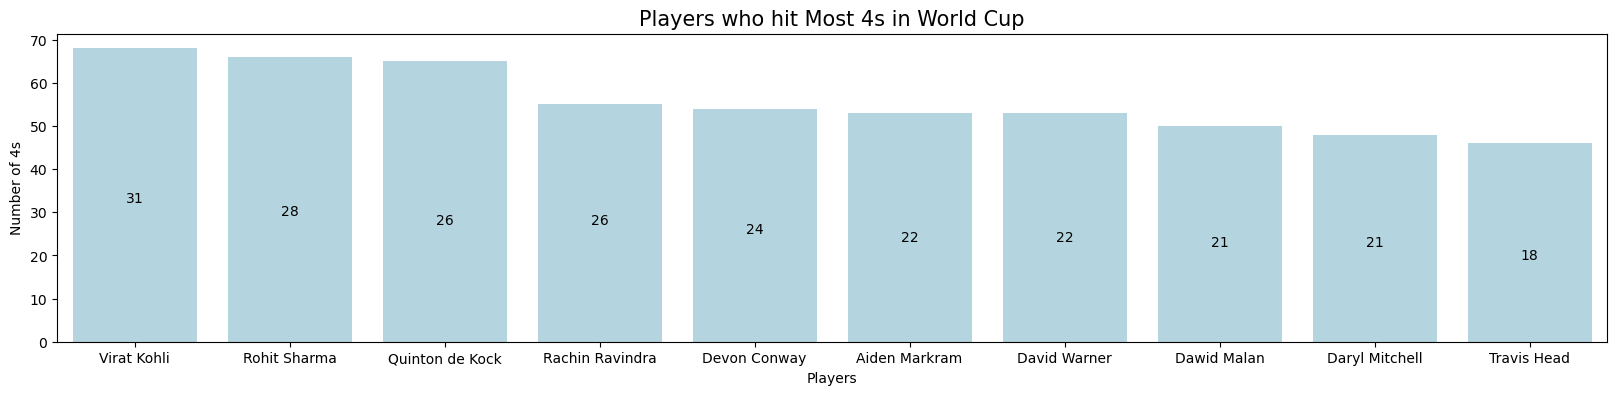

In [13]:
plt.figure(figsize=(20, 4))
fours=batting_dataset[batting_dataset['4s'] > 0]
total_4s = fours.groupby('Batsman_Name')['4s'].sum().sort_values(ascending=False)
sns.barplot(x=total_4s.head(10).index, y=total_4s.head(10).values, color='lightblue')
plt.title("Players who hit Most 4s in World Cup", size=15, color='black')
plt.xlabel("Players", size=10, color='black')
plt.ylabel("Number of 4s", size=10, color='black')



for index, value in enumerate(total_6s.head(10).values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [16]:
# players with highest avg score


# Counting the number of innings for each batsman
count_innings = batting_dataset['Batsman_Name'].value_counts().reset_index()
Batsmens_score = batting_dataset.groupby('Batsman_Name')['Runs'].sum().reset_index()
count_innings.columns = ['Batsman_Name', 'Innings']
# merging battsmen score and innings
Avg_score = pd.merge(count_innings, Batsmens_score, on='Batsman_Name', how='inner')
Avg_score


,Batsman_Name,Innings,Runs
0,David Warner,13,577
1,Steve Smith,12,351
2,Marnus Labuschagne,12,426
3,Quinton de Kock,12,706
4,Rassie van der Dussen,12,480
...,...,...,...
141,Shariz Ahmad,1,6
142,Lahiru Kumara,1,4
143,Usama Mir,1,0
144,Hasan Mahmud,1,15


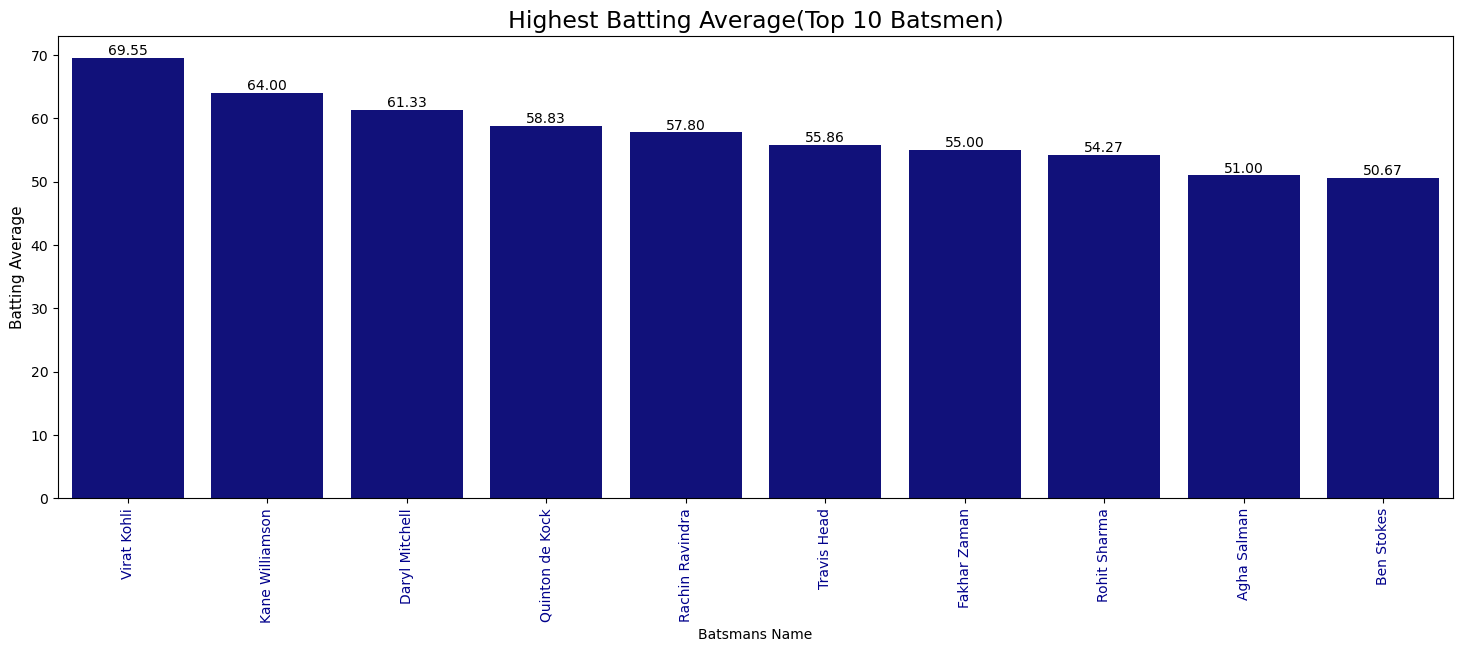

In [22]:

# batting average by name of the batsman
Avg_score['Batting_Avg'] = Avg_score['Runs'] / Avg_score['Innings']
#Calculate average batting average by name of the batsman
average_batting_average = Avg_score.groupby('Batsman_Name')['Batting_Avg'].mean().reset_index()

# Filter 'Innings' is zero to avoid division by zero
batting_average_data = Avg_score[Avg_score['Innings'] > 0]
 

# Sort by 'Batting_Average'
average_batting_average = average_batting_average.sort_values(by='Batting_Avg', ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x='Batsman_Name', y='Batting_Avg', data=average_batting_average.head(10), color='darkblue')
plt.title('Highest Batting Average(Top 10 Batsmen)', size=17, color='black')
plt.xlabel('Batsmans Name', size=10, color='black')
plt.ylabel('Batting Average', size=11, color='black')
plt.xticks(rotation=90, color='darkblue')

for index, value in enumerate(average_batting_average['Batting_Avg'].head(10)):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

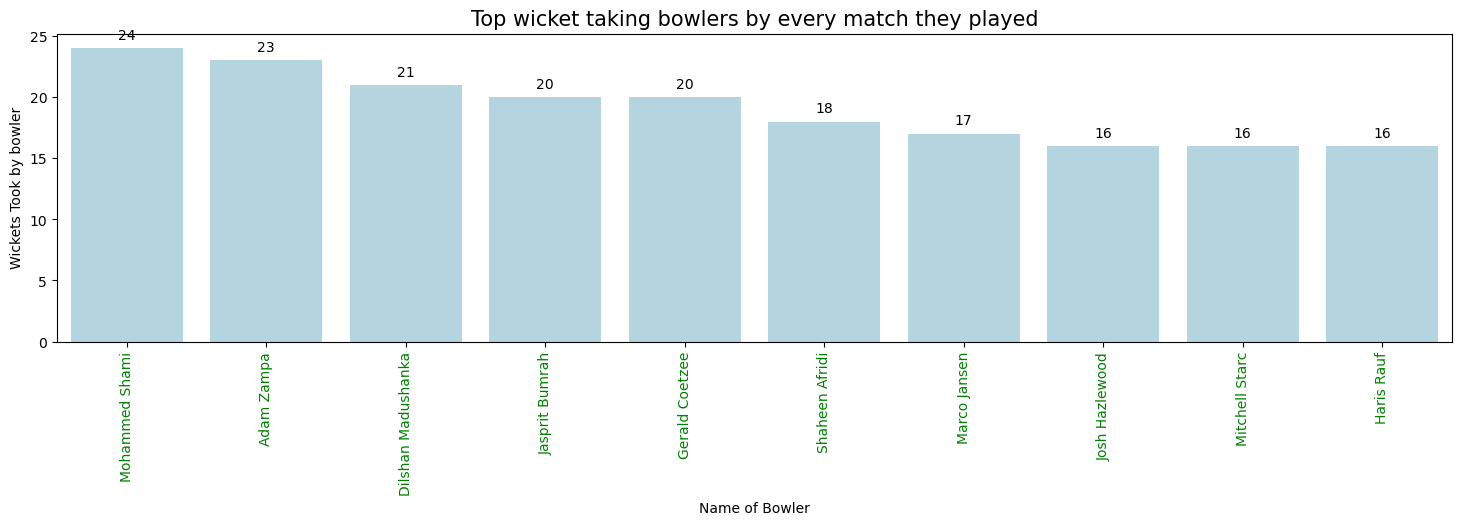

In [23]:
#bowling Analytics Section

#1.Top wicket taking bowlers

best_bowling_by_wickets = bowling_dataset.groupby('Bowler_Name')['Wickets'].sum().reset_index()#to
######################plot of wicket taking bowlers#####
plt.figure(figsize=(18, 4))
best_bowling_by_wickets = best_bowling_by_wickets.sort_values(by='Wickets', ascending=False)
sns.barplot(x='Bowler_Name', y='Wickets', data=best_bowling_by_wickets.head(10), color='lightblue')

plt.title('Top wicket taking bowlers by every match they played', size=15, color='black')
plt.xlabel('Name of Bowler', size=10, color='black')
plt.ylabel('Wickets Took by bowler', size=10, color='black')
plt.xticks(rotation=90, color='green')

for index, value in enumerate(best_bowling_by_wickets['Wickets'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


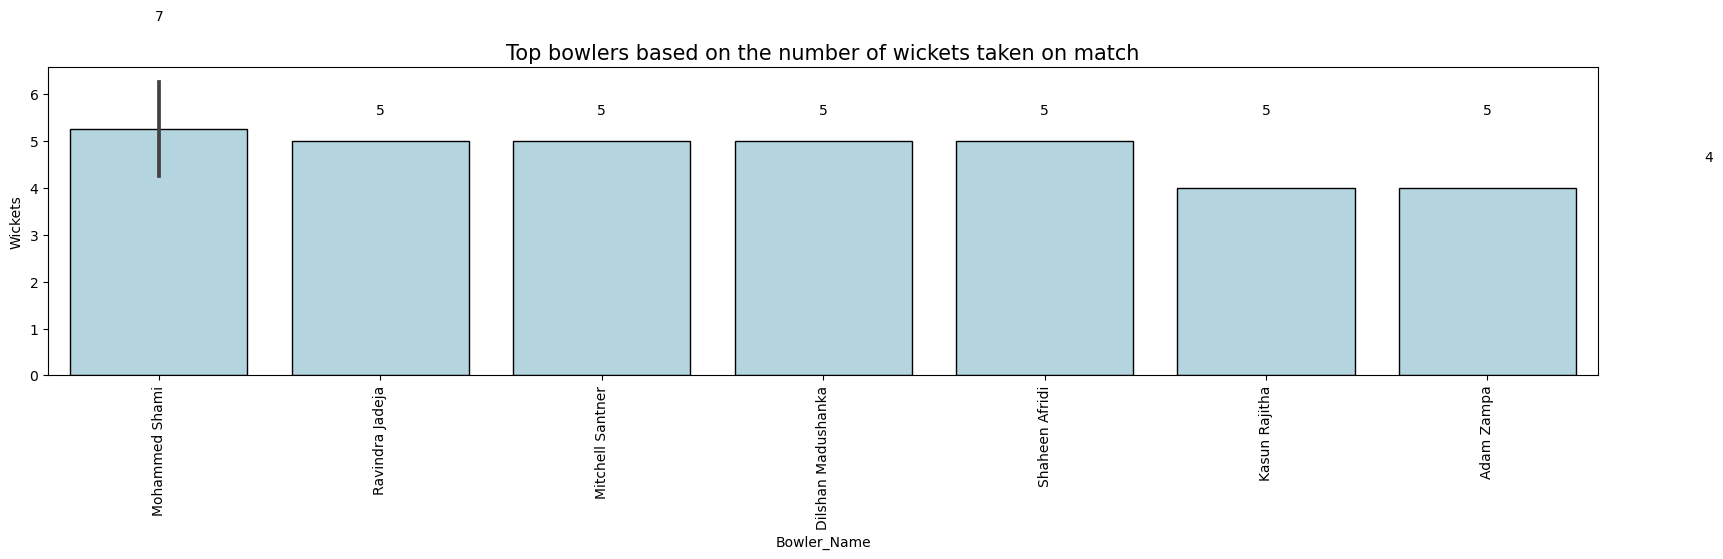

In [24]:
#2.Top bowlers based on the number of wickets taken on single match
plt.figure(figsize=(20, 4))
bowling_dataset = bowling_dataset.sort_values(by='Wickets', ascending=False)
sns.barplot(x='Bowler_Name', y='Wickets', data=bowling_dataset.head(10), color='lightblue', edgecolor='black')
plt.title('Top bowlers based on the number of wickets taken on match', size=15, color='black')
plt.xlabel('Bowler_Name', size=10, color='black')
plt.ylabel('Wickets', size=10, color='black')
plt.xticks(rotation=90, color='black')

for index, value in enumerate(bowling_dataset['Wickets'].head(8)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [25]:
bowling_dataset

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
547,46,India vs New Zealand,India,Mohammed Shami,9.5,0,57,7,5.797
439,37,India vs South Africa,India,Ravindra Jadeja,9.0,1,33,5,3.667
70,6,New Zealand vs Netherlands,New Zealand,Mitchell Santner,10.0,0,59,5,5.900
392,33,India vs Sri Lanka,India,Mohammed Shami,5.0,1,18,5,3.600
384,33,India vs Sri Lanka,Sri Lanka,Dilshan Madushanka,10.0,0,80,5,8.000
...,...,...,...,...,...,...,...,...,...
281,24,Australia vs Netherlands,Netherlands,Vikramjit Singh,4.0,0,27,0,6.750
429,36,Australia vs England,Australia,Travis Head,5.0,0,28,0,5.600
140,12,Pakistan vs India,India,Shardul Thakur,2.0,0,12,0,6.000
134,11,Bangladesh vs New Zealand,Bangladesh,Mehidy Hasan Miraz,9.0,0,58,0,6.444


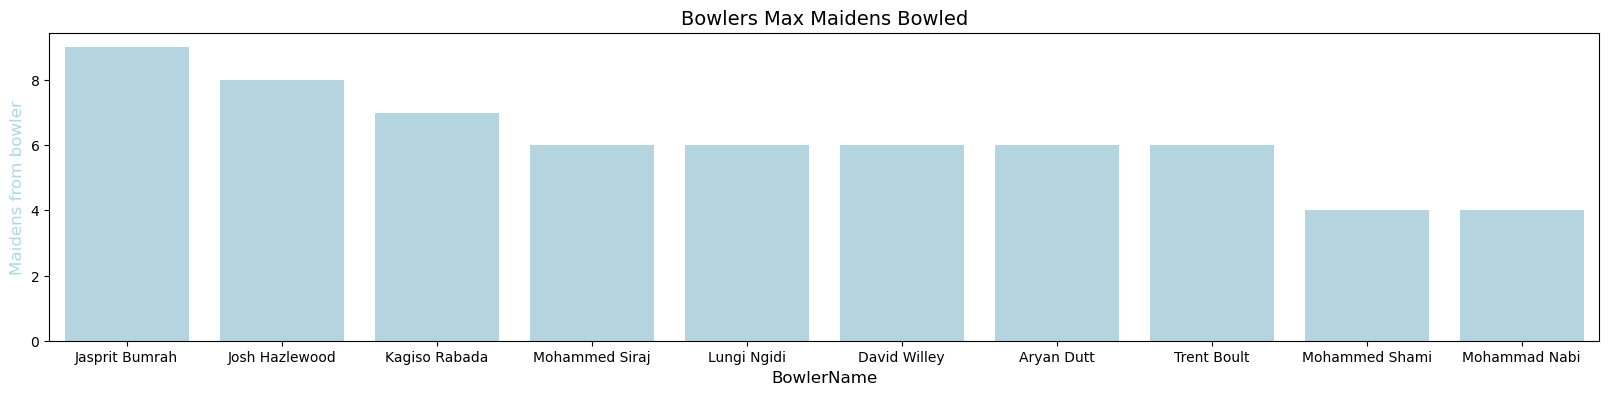

In [54]:
#3 bowlers with more maidens 

Maidens_overs = bowling_dataset.groupby('Bowler_Name')['Maidens'].sum().reset_index()
####maiden_overs#######
# Sorting the DataFrame by 'Maidens'
plt.figure(figsize=(20, 4))
Maidens_overs = Maidens_overs.sort_values(by='Maidens', ascending=False)


sns.barplot(x='Bowler_Name', y='Maidens', data=Maidens_overs.head(10), color='lightblue')
plt.title('Bowlers Max Maidens Bowled', size=14, color='black')
plt.xlabel('BowlerName', size=12, color='black')
plt.ylabel('Maidens from bowler', size=12, color='lightblue')

plt.show()



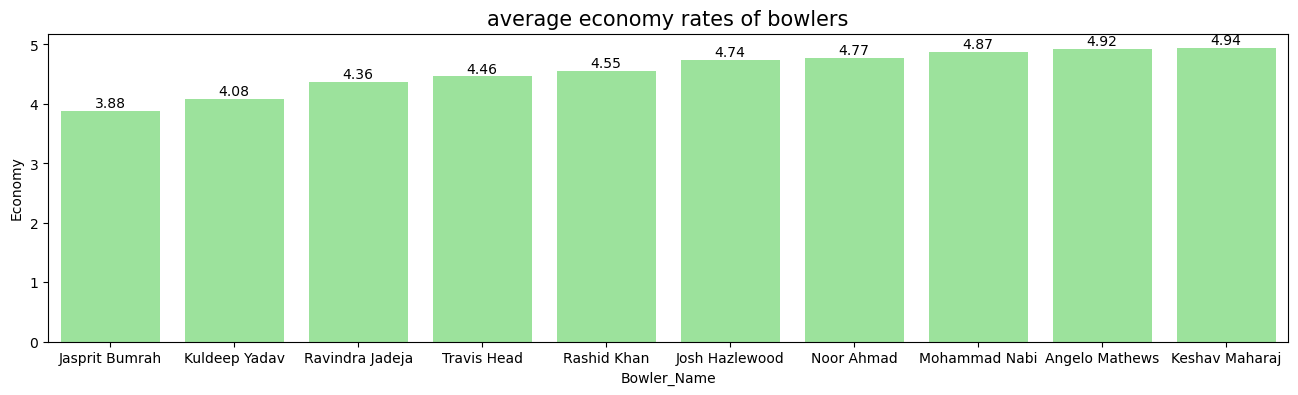

In [27]:
#4.finding the best average economy for bowler

min_overs_threshold = 20
filtered_data = bowling_dataset.groupby('Bowler_Name').filter(lambda x: x['Overs'].sum() >= min_overs_threshold)



plt.figure(figsize=(16, 4))
Bowler_Economy = filtered_data.groupby('Bowler_Name')['Economy'].mean().reset_index()
Bowler_Economy = Bowler_Economy.sort_values(by='Economy', ascending=True)
sns.barplot(x='Bowler_Name', y='Economy', data=Bowler_Economy.head(10), color='lightgreen')
plt.title('average economy rates of bowlers', size=15, color='black')
plt.xlabel('Bowler_Name', size=10, color='black')
plt.ylabel('Economy', size=10, color='black')


for index, value in enumerate(Bowler_Economy['Economy'].head(10)):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [28]:
#machine Learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix



In [29]:

merged_data = pd.merge(pd.merge(batting_dataset, bowling_dataset, on=['Match_no','Match_Between']), Match_Schedule_dataset, on='Match_no')
merged_data=merged_data.drop(['Scorecard URL'],axis=1)
merged_data

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_x,Balls,4s,6s,...,Overs,Maidens,Runs_y,Wickets,Economy,Date,Venue,Team1,Team2,Winner
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,1,48,3,4.800,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,0,37,2,3.700,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,3.0,0,17,2,5.670,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,1,48,1,4.800,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,0,76,1,7.600,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,7.0,0,45,1,6.429,2023-11-19,Ahmedabad,India,Australia,Australia
10944,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,2.0,0,5,0,2.500,2023-11-19,Ahmedabad,India,Australia,Australia
10945,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,2.0,0,4,0,2.000,2023-11-19,Ahmedabad,India,Australia,Australia
10946,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,10.0,0,43,0,4.300,2023-11-19,Ahmedabad,India,Australia,Australia


In [30]:

# dummies=merged_data(pd.get_dummies(['Winner']))


# winner_dummies = pd.get_dummies(merged_data['Winner'])

# # Concatenate the dummy variables with the original DataFrame
# merged_data = pd.concat([merged_data, winner_dummies], axis=1)
merged_data

# # Drop the original 'Winner' column if needed
# merged_data = merged_data.drop('Winner', axis=1)


,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_x,Balls,4s,6s,...,Overs,Maidens,Runs_y,Wickets,Economy,Date,Venue,Team1,Team2,Winner
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,1,48,3,4.800,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,0,37,2,3.700,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,3.0,0,17,2,5.670,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,1,48,1,4.800,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,10.0,0,76,1,7.600,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,7.0,0,45,1,6.429,2023-11-19,Ahmedabad,India,Australia,Australia
10944,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,2.0,0,5,0,2.500,2023-11-19,Ahmedabad,India,Australia,Australia
10945,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,2.0,0,4,0,2.000,2023-11-19,Ahmedabad,India,Australia,Australia
10946,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,...,10.0,0,43,0,4.300,2023-11-19,Ahmedabad,India,Australia,Australia


In [32]:


full_data=merged_data
merged_data.corr()

C:\Users\mruna\AppData\Local\Temp\ipykernel_24128\3886185883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.corr()


,Match_no,Batting_Position,Runs_x,Balls,4s,6s,Overs,Maidens,Runs_y,Wickets,Economy
Match_no,1.000000,-0.008809,0.006236,0.006776,-0.004524,0.038759,0.050597,0.034181,0.010533,0.002613,-0.043343
Batting_Position,-0.008809,1.000000,-0.371599,-0.390905,-0.418289,-0.188020,0.008064,0.008202,0.000813,0.031920,-0.007216
Runs_x,0.006236,-0.371599,1.000000,0.924139,0.899586,0.746637,0.016690,-0.045404,0.074975,-0.031716,0.079281
Balls,0.006776,-0.390905,0.924139,1.000000,0.811649,0.549135,0.016898,-0.020849,0.025443,-0.031729,0.020249
4s,-0.004524,-0.418289,0.899586,0.811649,1.000000,0.540110,0.003660,-0.043468,0.064887,-0.026291,0.076865
6s,0.038759,-0.188020,0.746637,0.549135,0.540110,1.000000,0.019225,-0.039518,0.098431,-0.016651,0.104175
Overs,0.050597,0.008064,0.016690,0.016898,0.003660,0.019225,1.000000,0.178008,0.670904,0.449071,-0.243127
Maidens,0.034181,0.008202,-0.045404,-0.020849,-0.043468,-0.039518,0.178008,1.000000,-0.159826,0.231114,-0.370069
Runs_y,0.010533,0.000813,0.074975,0.025443,0.064887,0.098431,0.670904,-0.159826,1.000000,0.215959,0.475519
Wickets,0.002613,0.031920,-0.031716,-0.031729,-0.026291,-0.016651,0.449071,0.231114,0.215959,1.000000,-0.225162


In [69]:
####################Model Section######################
#columns in the merged dataset
trget_NZ = (full_data['Winner']=='New Zealand')
target_ind=(full_data['Winner']=='India')
target_aus=(full_data['Winner']=='Australia')
target_SA=(full_data['Winner']=='South Africa')

selected_f=full_data[['Runs_x','Maidens','Runs_y','Wickets','Economy','Balls','4s','6s']]



train_X_nz, test_X_nz, train_y_nz, test_y_nz = train_test_split(selected_f, target_SA, test_size=0.30,random_state=18)

# the decision tree model
decisions_model_nz = DecisionTreeClassifier(max_depth=4)
decisions_model_nz.fit(train_X_nz, train_y_nz)

# Make predictions on the test data
predict_y_nz = decisions_model.predict(test_X_nz)

# Evaluate the model accuracy
model_accuracy_nz = accuracy_score(test_y_nz, predict_y_nz)
print("Model Accuracy:", model_accuracy_nz)

confuse_matrix_nz = confusion_matrix(test_y_nz, predict_y_nz)
confuse_matrix_nz




Model Accuracy: 0.8200913242009132


array([[2694,   48],
       [ 543,    0]], dtype=int64)

In [70]:
report_nz = classification_report(test_y_nz, predict_y_nz)
print(f'Classification Report:\n{report_nz}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2742
         1.0       0.00      0.00      0.00       543

    accuracy                           0.82      3285
   macro avg       0.42      0.49      0.45      3285
weighted avg       0.69      0.82      0.75      3285



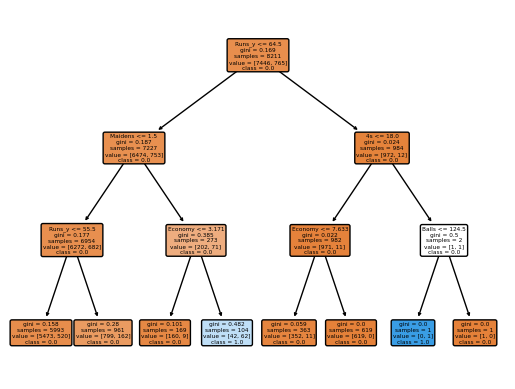

In [71]:

plot_tree(decisions_model, feature_names=['Runs_x','Maidens','Runs_y','Wickets','Economy','Balls','4s','6s'], class_names=[str(c) for c in decisions_model.classes_], filled=True, rounded=True)
plt.show()

In [43]:

# Merge with match data based on 'Match_no'x
merged_data_bowling = pd.merge(bowling_dataset, Match_Schedule_dataset,on=['Match_no'])

merged_data_bowling

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,46,India vs New Zealand,India,Mohammed Shami,9.5,0,57,7,5.797,2023-11-15,Mumbai,India,New Zealand,India,https://www.cricketwa.com/scorecard/23051/indi...
1,46,India vs New Zealand,New Zealand,Tim Southee,10.0,0,100,3,10.000,2023-11-15,Mumbai,India,New Zealand,India,https://www.cricketwa.com/scorecard/23051/indi...
2,46,India vs New Zealand,India,Kuldeep Yadav,10.0,0,56,1,5.600,2023-11-15,Mumbai,India,New Zealand,India,https://www.cricketwa.com/scorecard/23051/indi...
3,46,India vs New Zealand,India,Mohammed Siraj,9.0,0,78,1,8.667,2023-11-15,Mumbai,India,New Zealand,India,https://www.cricketwa.com/scorecard/23051/indi...
4,46,India vs New Zealand,New Zealand,Trent Boult,10.0,0,86,1,8.600,2023-11-15,Mumbai,India,New Zealand,India,https://www.cricketwa.com/scorecard/23051/indi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,43,Bangladesh vs Australia,Australia,Mitchell Marsh,4.0,0,48,0,12.000,2023-11-11,Pune,Australia,Bangladesh,Australia,https://www.cricketwa.com/scorecard/23049/aust...
570,43,Bangladesh vs Australia,Australia,Travis Head,6.0,0,33,0,5.500,2023-11-11,Pune,Australia,Bangladesh,Australia,https://www.cricketwa.com/scorecard/23049/aust...
571,43,Bangladesh vs Australia,Bangladesh,Mahedi Hasan,9.0,0,38,0,4.222,2023-11-11,Pune,Australia,Bangladesh,Australia,https://www.cricketwa.com/scorecard/23049/aust...
572,43,Bangladesh vs Australia,Bangladesh,Nasum Ahmed,10.0,0,85,0,8.500,2023-11-11,Pune,Australia,Bangladesh,Australia,https://www.cricketwa.com/scorecard/23049/aust...
